# Рынок объектов общественного питания  (ООП) Москвы

## Изучение данных и подготовка к анализу

Загрузим открытые данные о заведениях общественного питания Москвы.

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
from matplotlib import pyplot as plt
import seaborn as sns
import re
import requests
import io
import json

In [2]:
df = pd.read_csv('/datasets/rest_data.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15366 entries, 0 to 15365
Data columns (total 6 columns):
id             15366 non-null int64
object_name    15366 non-null object
chain          15366 non-null object
object_type    15366 non-null object
address        15366 non-null object
number         15366 non-null int64
dtypes: int64(2), object(4)
memory usage: 720.4+ KB


In [4]:
df.head(10)

,id,object_name,chain,object_type,address,number
0,151635,СМЕТАНА,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48
1,77874,Родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35
2,24309,Кафе «Академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95
3,21894,ПИЦЦЕТОРИЯ,да,кафе,"город Москва, Абрамцевская улица, дом 1",40
4,119365,Кафе «Вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50
5,27429,СТОЛ. ПРИ ГОУ СОШ № 1051,нет,столовая,"город Москва, Абрамцевская улица, дом 15, корп...",240
6,148815,Брусника,да,кафе,"город Москва, переулок Сивцев Вражек, дом 6/2",10
7,20957,Буфет МТУСИ,нет,столовая,"город Москва, Авиамоторная улица, дом 8, строе...",90
8,20958,КПФ СЕМЬЯ-1,нет,столовая,"город Москва, Авиамоторная улица, дом 8, строе...",150
9,28858,Столовая МТУСИ,нет,столовая,"город Москва, Авиамоторная улица, дом 8, строе...",120


Как мы видим, в столбце с названием объекта общественного питания (далее ООП) присутствуют названия в разных регистрах, а также некоторые названия взяты в кавычки и присутсвует ещё и название типа объекта. Приведём этот столбец к нижнему регистру и уберём кавычки.

In [5]:
df['object_name'] = df['object_name'].str.lower()

In [6]:
df['object_name'] = df['object_name'].str.replace('»', '')
df['object_name'] = df['object_name'].str.replace('«', '')
df['object_name'] = df['object_name'].str.strip()

In [7]:
len(df['object_name'].unique())

9840

В столбце с названием 9840 уникальных названий, там может быть большое количество дубликатов из-за того, что помимо названия присутствуют другие слова. Мы будем иметь это ввиду при анализе, но исправлять не будем из-за экономии временных ресурсов.

Приверим данные на наличие дубликатов.

In [8]:
df.duplicated().sum()

0

### Вывод

В нашем распоряжении таблица с данными о заведениях общественного питания Москвы (df). Дубликатов и пропусков в таблице нет. Тип данных во всех колонках соответствует значениям. Столбец с названиями заведений мы привели к нижнему регистру и удалили кавычки. В этом же столбце есть дубликаты названий из-за присутствия лишних слов, но как много таких дубликатов мы не знаем. Будем иметь ввиду, что дубликаты по названию могут как-то повлиять на результаты исследования, из-за них результат будет менее точным.

## Анализ данных

### Соотношение видов ООП по количеству

Сгруппируем наши данные по типу ООП, посчитаем количество объектов для каждого типа и отсортируем.

In [9]:
df1 = df.groupby('object_type').agg({'id': 'count'}).reset_index().sort_values('id', ascending = False)
df1.columns = ['object_type','count']

In [10]:
total = df1['count'].sum()

In [11]:
df1['part'] = df1['count'] / total

In [12]:
df_object = df1.sort_values('count', ascending = False).style.format({'part': '{:,.1%}'.format})

In [13]:
df_object

,object_type,count,part
3,кафе,6099,39.7%
8,столовая,2587,16.8%
7,ресторан,2285,14.9%
6,предприятие быстрого обслуживания,1923,12.5%
0,бар,856,5.6%
1,буфет,585,3.8%
4,кафетерий,398,2.6%
2,закусочная,360,2.3%
5,магазин (отдел кулинарии),273,1.8%


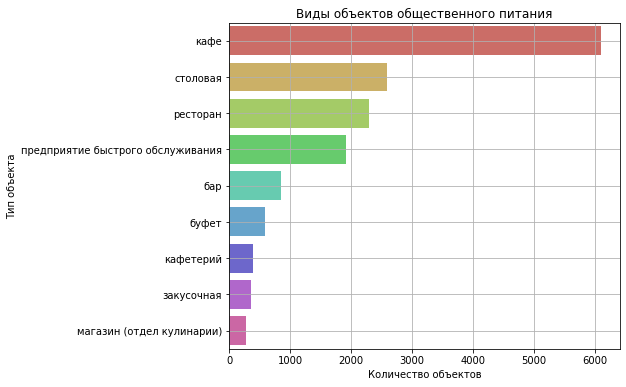

In [14]:
plt.figure(figsize=(7,6))
sns.barplot(x='count', y='object_type',  palette='hls', data=df1)
plt.title('Виды объектов общественного питания')
plt.xlabel('Количество объектов')
plt.ylabel('Тип объекта')
plt.grid()
plt.show()

Наибольшую долю рынка занимают кафе (39,7%), столовые (16,8%), рестораны (14,9%) и предприятия быстрого обслуживания (12,5%). Остальные (виды бар/буфет/кафетерий/закусочная/магазин) в сумме занимают отставшееся 16% рынка.

### Соотношение сетевых и несетевых заведений по количеству

Сгруппипуем наши данные по переменной 'chain' (сетевой ресторан), посчитаем количество ООП для сетевых и несетевых заведений.

In [15]:
df2 = df.groupby('chain').agg({'id': 'count'}).reset_index()
df2.columns = ['is_chain', 'count']
df2['part'] = df2['count'] / total

In [16]:
df_is_chain = df2.style.format({'part': '{:,.1%}'.format})
df_is_chain

,is_chain,count,part
0,да,2968,19.3%
1,нет,12398,80.7%


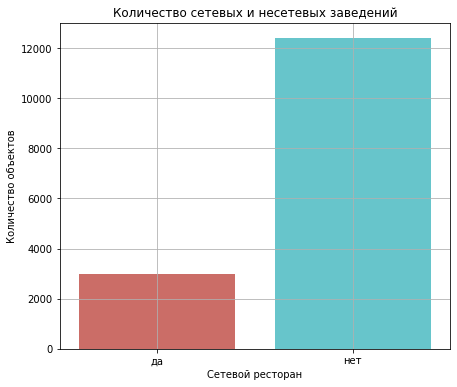

In [17]:
plt.figure(figsize=(7,6))
sns.barplot(x="is_chain", y="count", palette='hls', data=df2)
plt.title('Количество сетевых и несетевых заведений')
plt.xlabel('Сетевой ресторан')
plt.ylabel('Количество объектов')
plt.grid()
plt.show()

Доля несетевых объектов - 80,7%, а сетевых - 19,3%. Сетевых значительно меньше.

### Для какого вида ООП характерно сетевое распространение?

Сгруппируем данные по виду ООП, посчитаем количество сетевых и несетевых объектов для каждого ООП и долю сетевых для каждого вида ООП и отсортируем по доле.

In [18]:
df3 = df.pivot_table(index = 'object_type', columns = 'chain', values = 'id', aggfunc='count')
df3.columns = ['chain_yes', 'chain_no']
df3['total'] = df3['chain_yes'] + df3['chain_no']
df3['part_of_chain'] = df3['chain_yes'] / (df3['chain_yes'] + df3['chain_no'])

In [19]:
df_chain_type = df3.sort_values('part_of_chain', ascending = False).reset_index()
df_chain_type

,object_type,chain_yes,chain_no,total,part_of_chain
0,предприятие быстрого обслуживания,791,1132,1923,0.411336
1,магазин (отдел кулинарии),78,195,273,0.285714
2,ресторан,544,1741,2285,0.238074
3,кафе,1396,4703,6099,0.228890
4,закусочная,56,304,360,0.155556
5,кафетерий,52,346,398,0.130653
6,бар,37,819,856,0.043224
7,буфет,11,574,585,0.018803
8,столовая,3,2584,2587,0.001160


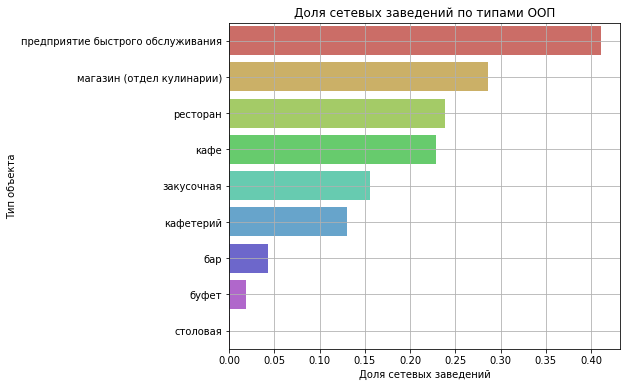

In [20]:
plt.figure(figsize=(7,6))
sns.barplot(y='object_type', x='part_of_chain', palette='hls', data=df_chain_type)
plt.title('Доля сетевых заведений по типами ООП')
plt.xlabel('Доля сетевых заведений')
plt.ylabel('Тип объекта')
plt.grid()
plt.show()

Сетевое распространение характерно для предприятий быстрого обслуживаня. Затем по убыванию доли сетевых заведений идут магазины, рестораны, кафе и закусочные. Сетевых буфетов и столовых практически нет.

### Что характерно для сетевых заведений?

Много заведений с небольшим числом посадочных мест в каждом или мало заведений с большим количеством посадочных мест?

Выделим из таблицы только сетевые объекты и посмотрим на распределение числа посадочных мест, чтобы понимать, что считать для Москвы небольшим числом мест, а что большим.

In [21]:
df_chain = df[df['chain'] == 'да']

In [22]:
df_chain.head()

,id,object_name,chain,object_type,address,number
3,21894,пиццетория,да,кафе,"город Москва, Абрамцевская улица, дом 1",40
6,148815,брусника,да,кафе,"город Москва, переулок Сивцев Вражек, дом 6/2",10
13,22579,алло пицца,да,кафе,"город Москва, улица Авиаторов, дом 14",32
16,144107,суши wok,да,предприятие быстрого обслуживания,"город Москва, Азовская улица, дом 3",7
18,58565,тануки,да,ресторан,"город Москва, Большая Академическая улица, дом 65",160


In [23]:
df_chain['number'].describe()

count    2968.000000
mean       52.919811
std        57.140644
min         0.000000
25%        15.000000
50%        40.000000
75%        72.000000
max       580.000000
Name: number, dtype: float64

Text(0.5, 0, 'Число посадочных мест')

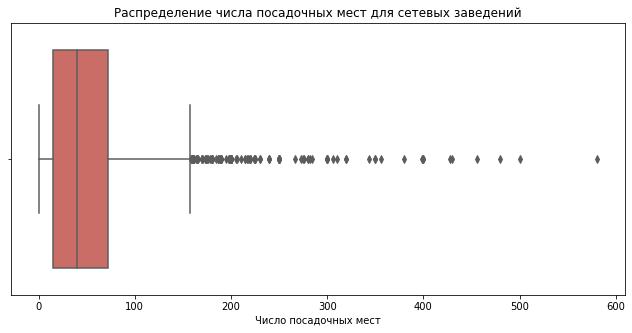

In [24]:
plt.figure(figsize=(11,5))
sns.boxplot(x='number', data=df_chain, palette='hls') 
plt.title('Распределение числа посадочных мест для сетевых заведений')
plt.xlabel('Число посадочных мест')

У большей части сетевых заведений вместимость не более 72 мест, 150 мест - это уже большая редкость.

Сгруппируем по названию заведения, посчитаем количество объектов в каждой сети и среднее и медиану посадочных мест в каждой сети. Отсортируем по количеству объектов в сети, посмотрим на результат.

In [25]:
chain = df_chain.groupby('object_name').agg({'id': 'count', 'number': ['mean', 'median']}).reset_index()
chain.columns = ['object_name', 'count', 'seats_mean', 'seats_median']

In [26]:
chain.sort_values('count', ascending = False).head(10)

,object_name,count,seats_mean,seats_median
540,шоколадница,157,57.184713,50.0
25,kfc,155,55.341935,45.0
314,макдоналдс,151,87.119205,76.0
107,бургер кинг,137,46.649635,45.0
499,теремок,94,25.606383,23.0
295,крошка картошка,90,21.855556,15.0
157,домино'с пицца,90,18.344444,16.0
323,милти,72,1.333333,0.0
483,суши wok,72,6.708333,6.0
351,папа джонс,51,22.039216,20.0


In [27]:
chain['count'].describe()

count    554.000000
mean       5.357401
std       15.857254
min        1.000000
25%        1.000000
50%        1.000000
75%        3.000000
max      157.000000
Name: count, dtype: float64

Мы видим, что в сетевые заведения попали заведения с одним объектом, а это по логике нельзя считать сетью. На этапе изучения данных мы увидели, что в столбце с названием было много дубликатов и приняли решение их не менять. Посмотрим на распределение количества заведений без единичных заведений.

In [28]:
chain_report = chain.query('count > 1')

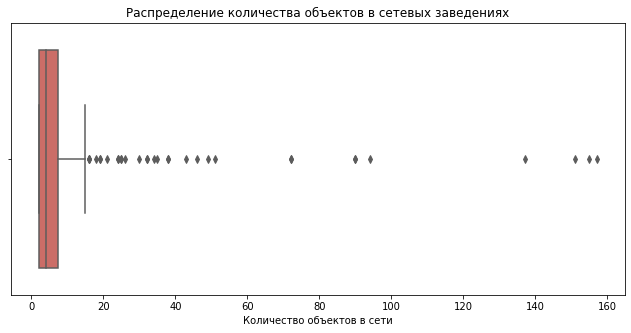

In [29]:
plt.figure(figsize=(11,5))
sns.boxplot(x='count', data=chain_report, palette='hls') 
plt.title('Распределение количества объектов в сетевых заведениях')
plt.xlabel('Количество объектов в сети')
plt.show()

In [30]:
chain_report['count'].describe()

count    248.000000
mean      10.733871
std       22.592539
min        2.000000
25%        2.000000
50%        4.000000
75%        7.250000
max      157.000000
Name: count, dtype: float64

Большинство сетей (75%) имеют небольшое количество объектов в сети - менее 7 и только 25% более 7. Посмотрим на медианы количества мест для сетей, у которых в сети не более 4 объектов. Построим график распределения медиан количества мест для таких сетей.

In [31]:
chain_report_number = chain_report.query('count <= 7')

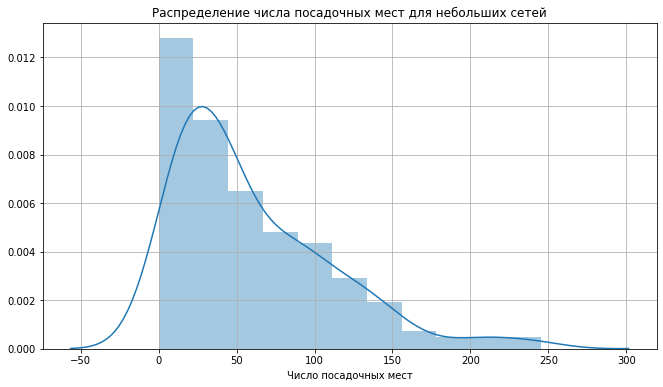

In [32]:
plt.figure(figsize=(11,6))
sns.distplot(chain_report_number['seats_median'])
plt.title('Распределение числа посадочных мест для небольших сетей')
plt.xlabel('Число посадочных мест')
plt.grid()
plt.show()

In [33]:
chain_report_number['seats_median'].describe()

count    186.000000
mean      59.779570
std       50.587466
min        0.000000
25%       20.000000
50%       45.000000
75%       89.750000
max      245.000000
Name: seats_median, dtype: float64

Посмотрим распределения количества объектов в сети и числа посадочных мест ещё на одном типе графика (совместного распределения), для сгруппированной по названиям  таблицы и отфильтрованной от дубликатов (chain_report).

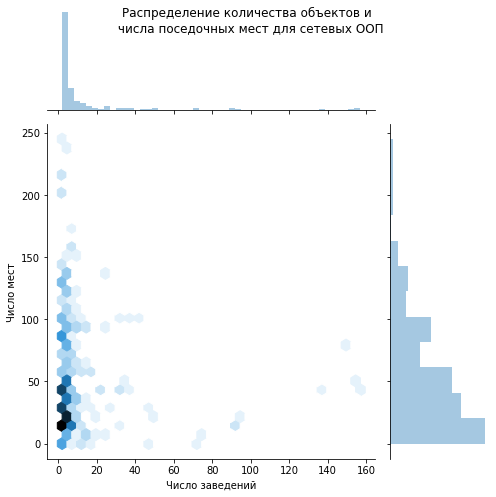

In [73]:
jg = sns.jointplot(x='count', y='seats_median', kind='hex', data=chain_report, height = 7, ratio=3)

jg.set_axis_labels('Число заведений','Число мест')
plt.tight_layout()

title ='Распределение количества объектов и \n числа поседочных мест для сетевых ООП'

_ = jg.fig.suptitle(title)

Для сетевых заведений характерно мало заведений (4) с небольшим количеством посадочных мест (~40-60).

### Какой вид ООП предоставляет в среднем самое большое количество посадочных мест?

Сгруппируем исходную таблицу (df) по виду ООП, посчитаем среднне количество посадочных мест для каждого вида и отсортируем результат по среднему количеству мест.

In [35]:
number_mean = df.groupby('object_type').agg({'number': 'mean'}).reset_index().sort_values('number', ascending = False)
number_mean['number'] = number_mean['number'].round()
number_mean


,object_type,number
8,столовая,130.0
7,ресторан,97.0
1,буфет,51.0
0,бар,43.0
3,кафе,40.0
6,предприятие быстрого обслуживания,21.0
4,кафетерий,9.0
2,закусочная,8.0
5,магазин (отдел кулинарии),6.0


Text(0, 0.5, 'Количество посадочных мест')

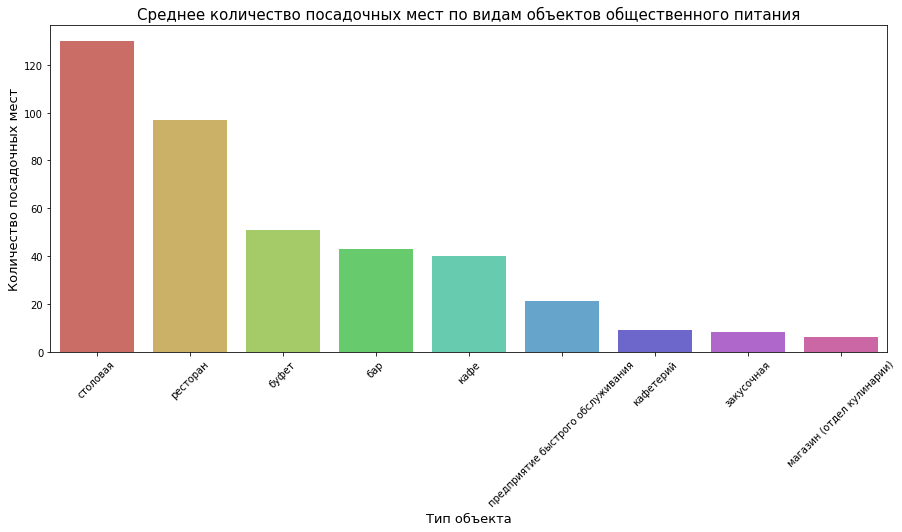

In [36]:
plt.figure(figsize=(15,6))
plt.xticks(rotation=45)
sns.barplot(x='object_type', y='number', palette='hls', data=number_mean)
plt.title('Среднее количество посадочных мест по видам объектов общественного питания', fontsize=15)
plt.xlabel('Тип объекта', fontsize=13)
plt.ylabel('Количество посадочных мест', fontsize=13)

Самое большое количество посадочных мест предоставляют столовые (130 посадочных мест в среднем), далее по убыванию среднего количества посадочных мест идут рестораны (97 мест), буфеты (51), бары (43) и замыкают топ-5 - кафе (40 мест).

### Столбец с информацей об улице из столбца address

In [37]:
df['street'] = df['address'].str.extract(',\s([-№\w+\s]+),')

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15366 entries, 0 to 15365
Data columns (total 7 columns):
id             15366 non-null int64
object_name    15366 non-null object
chain          15366 non-null object
object_type    15366 non-null object
address        15366 non-null object
number         15366 non-null int64
street         15331 non-null object
dtypes: int64(2), object(5)
memory usage: 840.5+ KB


In [39]:
df[df['street'].isna()].head()

,id,object_name,chain,object_type,address,number,street
859,23601,буфет - гбоу сош № 64,нет,буфет,"Партизанская улица, дом 30",100,NaN
860,23604,буфет - гбоу 60,нет,буфет,"Партизанская улица, дом 30",100,NaN
1491,25349,ресторан гранатовый сад,нет,ресторан,"Поречная улица, дом 5/14, строение 1",40,NaN
7691,132359,кафе la carotte,нет,кафе,"1-й Нагатинский проезд, дом 10",198,NaN
7827,28214,роснефть (закрытое),нет,столовая,"Софийская набережная, дом 26/1, строение 1",80,NaN


In [40]:
df_rest = df[~(df['street'].isnull())]

In [41]:
df_rest.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15331 entries, 0 to 15365
Data columns (total 7 columns):
id             15331 non-null int64
object_name    15331 non-null object
chain          15331 non-null object
object_type    15331 non-null object
address        15331 non-null object
number         15331 non-null int64
street         15331 non-null object
dtypes: int64(2), object(5)
memory usage: 958.2+ KB


In [42]:
df_rest.tail()

,id,object_name,chain,object_type,address,number,street
15361,208537,шоколадница,да,кафе,"город Москва, 3-й Крутицкий переулок, дом 18",50,3-й Крутицкий переулок
15362,209264,шоколадница,да,кафе,"город Москва, улица Земляной Вал, дом 33",10,улица Земляной Вал
15363,209186,шоколадница,да,кафе,"город Москва, улица Земляной Вал, дом 33",20,улица Земляной Вал
15364,221900,шоколадница,да,кафе,"город Москва, поселение Московский, Киевское ш...",36,поселение Московский
15365,222535,шоколадница,да,кафе,"город Москва, Ходынский бульвар, дом 4",10,Ходынский бульвар


Мы выделели информацию об улице в отдельный столбец, удалили строки, где выделение не сработало и получили новыую таблицу - df_rest.

### График топ-10 улиц по количеству ООП

Сгруппируем таблицу df_rest по названию улиц, посчитаем количество объектов на каждой улице, отсортируем по убыванию количества объектов и посмотрим на результат.

In [43]:
streets_rest = df_rest.groupby('street').agg({'id': 'count'}).reset_index()

In [44]:
streets_top = streets_rest.sort_values(by='id', ascending=False)
streets_top.columns = ['street', 'objects']
streets_top.sort_values(by='objects', ascending=False).head(10)

,street,objects
1335,город Зеленоград,232
1433,проспект Мира,204
997,Профсоюзная улица,182
686,Ленинградский проспект,171
983,Пресненская набережная,167
408,Варшавское шоссе,161
689,Ленинский проспект,147
1399,поселение Сосенское,138
1430,проспект Вернадского,132
677,Кутузовский проспект,114


В лидеры попали Зеленоград и Сосенсков. Зеленоград - один из 12 административных округов Москвы, а Сосенское - это административная единица со статусом поселения в составе Новомосковского административного округа Москвы. В нашем исследовании нас больше интересуют улицы, поэтому мы уберём из анализа данные территории (их можно исследовать отдельно в дальнейшем). Посмотрим на таблицу топ-10 улиц без этих территорий.

In [45]:
only_streets = streets_top.query('street not in ("город Зеленоград", "поселение Сосенское")').sort_values(
    by='objects', ascending=False).head(10)
only_streets

,street,objects
1433,проспект Мира,204
997,Профсоюзная улица,182
686,Ленинградский проспект,171
983,Пресненская набережная,167
408,Варшавское шоссе,161
689,Ленинский проспект,147
1430,проспект Вернадского,132
677,Кутузовский проспект,114
602,Каширское шоссе,112
608,Кировоградская улица,110


Text(0, 0.5, 'Количество объектов')

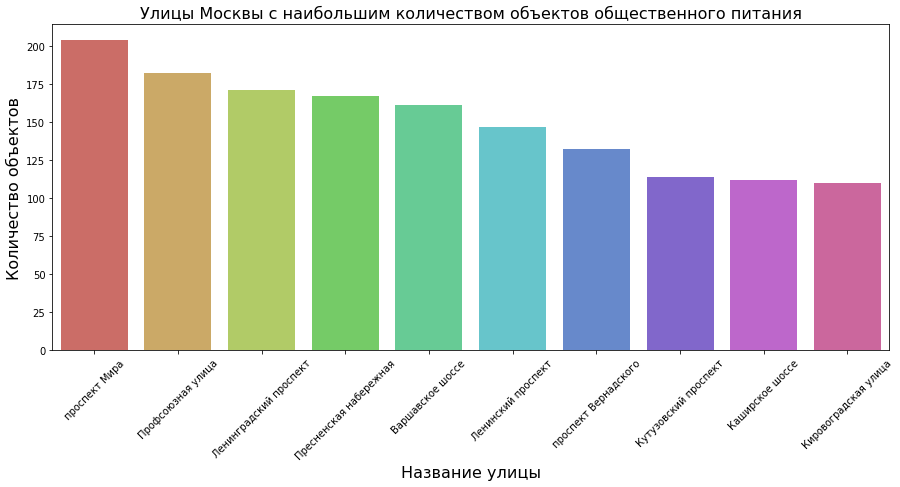

In [46]:
plt.figure(figsize=(15,6))
plt.xticks(rotation=45)
sns.barplot(x='street', y='objects', palette='hls', data=only_streets)
plt.title('Улицы Москвы с наибольшим количеством объектов общественного питания', fontsize=16)
plt.xlabel('Название улицы', fontsize=16)
plt.ylabel('Количество объектов', fontsize=16)

Теперь мы знаем, на каких улицах наибольшая концентрация ООП Москвы. Посмотрим, к каким районам относятся эти улицы.

Возьмем таблицу из интернета "Контакты структур мосгаза по улицам и районам" и присоединим информаицю об районах к таблице с топ-10 улиц.

In [47]:
# district = pd.read_csv('https://drive.google.com/file/d/1u4ueOo5_AKeXzX_tPirhHE5N6ucZd7cj/view?usp=sharing', sep=';')

In [48]:
response = requests.get('http://hubofdata.ru/storage/f/2013-10-22T09%3A25%3A27.793Z/mosgaz-streets.csv')
file = io.StringIO(response.content.decode('utf-8'))
mosgaz = pd.read_csv(file)

mosgaz.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4398 entries, 0 to 4397
Data columns (total 4 columns):
streetname    4398 non-null object
areaid        4398 non-null int64
okrug         4398 non-null object
area          4398 non-null object
dtypes: int64(1), object(3)
memory usage: 137.6+ KB


In [75]:
#Код ревьюера
url = 'https://drive.google.com/uc?id=1u4ueOo5_AKeXzX_tPirhHE5N6ucZd7cj'
demo = pd.read_csv(url)
demo.head(5)

,streetname,areaid,okrug,area
0,Выставочный переулок,17,ЦАО,Пресненский район
1,улица Гашека,17,ЦАО,Пресненский район
2,Большая Никитская улица,17,ЦАО,Пресненский район
3,Глубокий переулок,17,ЦАО,Пресненский район
4,Большой Гнездниковский переулок,17,ЦАО,Пресненский район


In [49]:
mosgaz.head(5)

,streetname,areaid,okrug,area
0,Выставочный переулок,17,ЦАО,Пресненский район
1,улица Гашека,17,ЦАО,Пресненский район
2,Большая Никитская улица,17,ЦАО,Пресненский район
3,Глубокий переулок,17,ЦАО,Пресненский район
4,Большой Гнездниковский переулок,17,ЦАО,Пресненский район


In [50]:
streets_area = only_streets.merge(mosgaz[['streetname', 'okrug', 'area']], left_on='street', right_on='streetname')

In [51]:
streets_area.head(10)

,street,objects,streetname,okrug,area
0,проспект Мира,204,проспект Мира,СВАО,Алексеевский район
1,проспект Мира,204,проспект Мира,СВАО,Ярославский Район
2,проспект Мира,204,проспект Мира,СВАО,Район Марьина роща
3,проспект Мира,204,проспект Мира,СВАО,Останкинский район
4,проспект Мира,204,проспект Мира,СВАО,Район Ростокино
5,проспект Мира,204,проспект Мира,СВАО,Район Свиблово
6,проспект Мира,204,проспект Мира,ЦАО,Мещанский район
7,Профсоюзная улица,182,Профсоюзная улица,ЮЗАО,Академический район
8,Профсоюзная улица,182,Профсоюзная улица,ЮЗАО,Район Черемушки
9,Профсоюзная улица,182,Профсоюзная улица,ЮЗАО,Район Ясенево


In [52]:
area_amount = streets_area.groupby('street').agg({'area': 'count'})
area_amount.columns = ['area_amount']
area_amount.sort_values('area_amount', ascending = False)

,area_amount
street,
Варшавское шоссе,8
Ленинский проспект,8
проспект Мира,7
Профсоюзная улица,6
проспект Вернадского,5
Каширское шоссе,4
Ленинградский проспект,4
Кировоградская улица,3
Кутузовский проспект,2


In [53]:
streets_amount = streets_area.groupby('area').agg({'street': 'count'})
streets_amount.columns = ['streets_amount']
streets_amount.sort_values('streets_amount', ascending = False)

,streets_amount
area,
Район Чертаново Центральное,2
Донской район,2
Ломоносовский район,2
Район Проспект Вернадского,2
Обручевский район,2
Район Теплый Стан,2
Район Нагатино-Садовники,2
Район Чертаново Южное,2
Район Тропарево-Никулино,2


In [54]:
len(streets_amount)

37

Почти все улицы из топ-10 по количеству ООП (кроме одной - Пресненская набережная) проходят через несколько районов, что указывает на то, что это длинные улицы. Всего районов с улицами из топ-10 по количеству ООП - 37. В нескольких районах проходят сразу две улицы из топ-10.

### Улицы с одним ООП

Из сгруппированной по улицам таблицы (streets_rest) возьмём только улицы с одним ООП.

In [55]:
streets_rest.head()

,street,id
0,1-й Автозаводский проезд,3
1,1-й Амбулаторный проезд,2
2,1-й Балтийский переулок,1
3,1-й Басманный переулок,1
4,1-й Ботанический проезд,1


In [56]:
streets_one_obj = streets_rest.query('id == 1')
len(streets_one_obj)

564

Всего 564 улицы в Москве с одним объектом общественного питания.

Присоединим к таблице с улицами с одним объектом (streets_one_obj) информацию о районах Москвы.

In [57]:
str_merged = streets_one_obj.merge(
    mosgaz[['streetname', 'okrug', 'area']], left_on='street', right_on='streetname')

In [58]:
str_merged.head()

,street,id,streetname,okrug,area
0,1-й Балтийский переулок,1,1-й Балтийский переулок,САО,Район Аэропорт
1,1-й Басманный переулок,1,1-й Басманный переулок,ЦАО,Басманный район
2,1-й Басманный переулок,1,1-й Басманный переулок,ЦАО,Красносельский район
3,1-й Ботанический проезд,1,1-й Ботанический проезд,СВАО,Район Свиблово
4,1-й Вешняковский проезд,1,1-й Вешняковский проезд,ЮВАО,Рязанский район


In [59]:
street_area_amount = str_merged.groupby('street').agg({'area': 'count'})
street_area_amount.columns = ['area_amount']
street_area_amount.sort_values('area_amount', ascending = False).head(10)

,area_amount
street,
Хавская улица,3
11-я Парковая улица,3
улица Достоевского,3
Нарвская улица,3
Мерзляковский переулок,2
Глазовский переулок,2
улица Павла Андреева,2
Балтийская улица,2
Чермянская улица,2


Теперь посмотрим, сколько улиц с одним ООП попадает в каждый район и сколько в итоге уникальных районов с такими улицами.

In [60]:
str_merged.groupby('area').agg({'street': 'count'}).sort_values('street', ascending = False)

,street
area,
Таганский район,27
Район Хамовники,26
Басманный район,25
Тверской район,20
Пресненский район,19
...,...
Район Марьино,1
Район Матушкино-Савелки,1
Район Метрогородок,1


Мы получили 99 районов с улицами, на которых находится по одному ООП.

Улиц с одним ООП в Москве - 564. Они находятся в 99 районах Москвы. Сейчас в Москве 12 округов, в которые входят 125 районов и 21 поселение. Получается, что во многих районах всего одно ООП и их можно рассматривать в качестве потешнциально успешных для открытия нового заведения. Но прежде нужно более детально изучить особенности районов и улиц, их инфраструктуру и исходя из этого выбрать место для нового проекта с роботами.

### Распределение количества посадочных мест для улиц с большим количеством ООП

У нас есть то-10 улиц по числу посадочных мест, посмотрим на распределение этого числа по каждой улице.

In [61]:
only_streets

,street,objects
1433,проспект Мира,204
997,Профсоюзная улица,182
686,Ленинградский проспект,171
983,Пресненская набережная,167
408,Варшавское шоссе,161
689,Ленинский проспект,147
1430,проспект Вернадского,132
677,Кутузовский проспект,114
602,Каширское шоссе,112
608,Кировоградская улица,110


In [62]:
top_streets_number = df_rest[df_rest['street'].isin(only_streets['street'])]

Text(0.5, 0, 'Число посадочных мест')

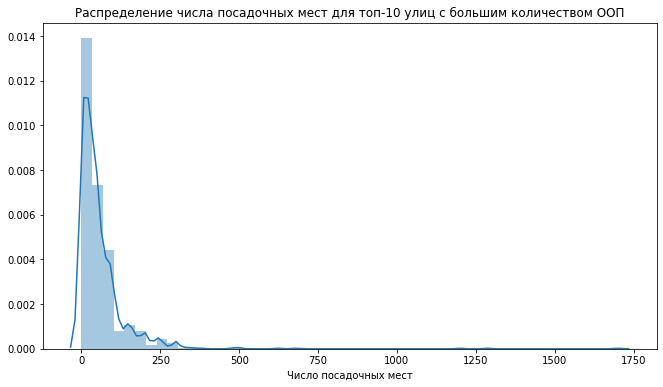

In [63]:
plt.figure(figsize=(11,6))
sns.distplot(top_streets_number['number'])
plt.title('Распределение числа посадочных мест для топ-10 улиц с большим количеством ООП')
plt.xlabel('Число посадочных мест')

In [64]:
top_streets_number_10 = top_streets_number.query('number < 500')

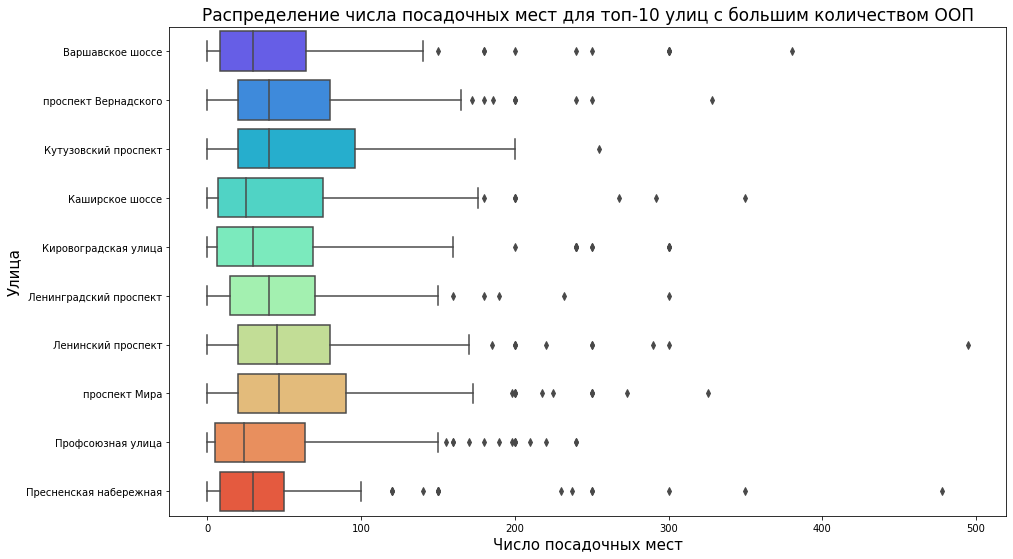

In [65]:
plt.figure(figsize=(15,9))
#sns.violinplot(x='number', y ='street', data=top_streets_number, palette='rainbow')
sns.boxplot(x='number', y ='street', data=top_streets_number_10, palette='rainbow')
plt.title('Распределение числа посадочных мест для топ-10 улиц с большим количеством ООП', fontsize=17)
plt.xlabel('Число посадочных мест', fontsize=15)
plt.ylabel('Улица', fontsize=15)
plt.show()

- Самый большой разброс значений числа мест на Кутузовском проспекте
- Заведения на проспектах отличаются бОльшей вместительностью, чем на шоссе (у них больше медиана).
- Малый разброс на Преснесенской набережной и короткий верхний ус графика, что говорит о том, что по  вместимости там кафе чаще меньше, чем на других топ-улицах. Эта улица проходит вдоль делового центра Москва-Сити, возможно там дорого стоит  аренда помещения.

Посмотрим на распределения числа мест по тем же улицам и добавим разбивку заведений на сетевые и несетевые.

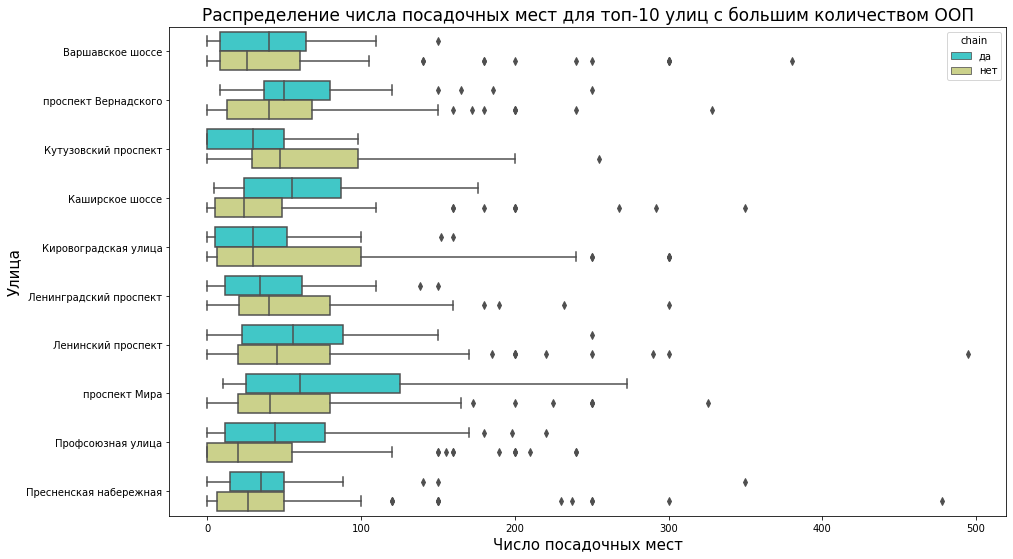

In [66]:
plt.figure(figsize=(15,9))
#sns.violinplot(x='number', y ='street', data=top_streets_number, palette='rainbow')
sns.boxplot(x='number', y ='street', data=top_streets_number_10, palette='rainbow', hue="chain")
plt.title('Распределение числа посадочных мест для топ-10 улиц с большим количеством ООП', fontsize=17)
plt.xlabel('Число посадочных мест', fontsize=15)
plt.ylabel('Улица', fontsize=15)
plt.show()

- На всех улицах кроме Кутузовского проспекта  и Кировоградской улицы вместительность сетевых заведений больше, чем несетевых
- Ну Кутузовском проспекте количество мест в сетевых заведениях значительно меньше, чем в несетевых. Возможно сети там имеют небольшой стратегический объект для узнаваемости бренда. На Кировоградской улице медиана значений одинаковая, но у несетевых заведений бОльший разброс значений
- Сетевые заведения бОльшей вместительности чаще можно встретитьна проспекте Мира

## Общий вывод

- Наибольшую долю рынка занимают кафе (39,7%), столовые (16,8%), рестораны (14,9%) и предприятия быстрого обслуживания (12,5%)
- Доля несетевых объектов - 80,7%, а сетевых - 19,3%
- Сетевое распространение характерно для предприятий быстрого обслуживаня, отделов кулинарии, ректоранов и кафе
- Для сетевых заведений характерно мало заведений (4) с небольшим количеством посадочных мест (~40-60).
- Самое большое количество посадочных мест предоставляют столовые (130 посадочных мест в среднем), рестораны (97 мест), буфеты (51), бары (43), кафе (40 мест).
- Почти все улицы из топ-10 по количеству заведений (кроме одной - Пресненская набережная) проходят через несколько районов, что указывает на то, что это крупные улицы. Всего районов с улицами из топ-10 по количеству ООП - 37. В нескольких районах проходят сразу две улицы из топ-10. 
<br>Топ-10 улиц по количеству ООП:
<br>проспект Мира - 204
<br>Профсоюзная улица - 182
<br>Ленинградский проспект - 171
<br>Пресненская набережная - 167
<br>Варшавское шоссе - 161
<br>Ленинский проспект - 147
<br>проспект Вернадского - 132
<br>Кутузовский проспект - 114
<br>Каширское шоссе - 112
<br>Кировоградская улица - 110
- Улиц с одним ООП в Москве - 564. Они находятся в 99 районах Москвы.
- Кутузовский проспект отличается самым большим разнообразием заведений по количеству мест. Несетевые заведения здесь самые вместительные, а сетевые по сравнению с ними отличаются малым количеством мест. А вот на проспекте Мира можно встретить наибольшее количество вместительных сетевых заведений.

В целом исследование показало, что именно небольшие кафе в Москве пользуются спросом. Есть перспектывы вырасти в сеть, если верно выбрать точки для своих объектов. Для этого необходимо провести дополнительное исследование улиц и районов, их инфраструктуру и потребности. 

Исходя из данного исследования получается, что кафе можно расположить на одной из топ-10 улиц по количеству ООП, например на одном из проспектов. А можно на Пресненской набережной, публика находящегося рядом делового центра Москва-Сити явно оценит инновационный  подход и преимущества (скорость обслуживания) нового заведения с роботами-официантами.

Презентация: <https://cloud.mail.ru/public/jxJc/yCAuAsHDi>